# Neural Network basics<a id="Top"></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
Table of Content
<ul>
<li>1. <a href="#Part_1">The Perceptron</a></li>
<li>2. <a href="#Part_2">Perceptron in action</a></li>
<li>3. <a href="#Part_3">The XOR classification problem</a></li>
<li>4. <a href="#Part_4">Multi-Layer Perceptron</a></li>    
</font>
</div>

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#from IPython.display import HTML, display

# Define overall figure size. Use the Golden ratio to compute width and height.
height = 6.0
width = height*0.5*(1.0+np.sqrt(5.0))

plt.rcParams['figure.figsize'] = (width, height)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'

## 1. The Perceptron

__Linear Threshold Unit (LTU)__ is a design of artificial neuron. Its structure is depicted as follows

<img src="./images/fig_LTU.png" width='300'>

A LTU takes inputs (in this example: $x_0$, $x_1$, and $x_2$), applies an activation function on a weighted sum of the inputs, then outputs the results. Written in mathematics, the procedure can be expressed as

$$ \mbox{Output}=h_{\mathbf{w}}(z),\,\,\,\,\,\mbox{where}\,\,\,z = w_1 x_1 + w_2 x_2 + w_3 x_3 $$

Basically the LTU is performing a transformation on the inputs. In fact, this is exactly what neural networks do under the hood. The difference being large complex networks are carrying out many layers of non-linear transformations. For $n$ inputs, the weighted sum is

$$ z = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = \mathbf{w}^T\cdot\mathbf{x}, $$

where in the last term we have used the vector notation. Typically $x_0=1$ is the bias term. Each input $x_i$ is associated with a weight $w_i$. There are two common activation functions

- Heaviside step function 

$$
h(z) = \left\{\begin{array}{cc}
               0 & \mbox{if}\,\, z < 0,\\
               1 & \mbox{if}\,\, z \geq 0.
               \end{array}
        \right. 
$$


- Sign function

$$ \mbox{sgn}(z) = \left\{\begin{array}{cc}
                 -1 & \mbox{if}\,\, z < 0,\\
                  0 & \mbox{if}\,\, z = 0, \\
                  1 & \mbox{if}\,\, z > 0.
               \end{array}
        \right. 
$$
    
A __Perceptron__ is composed of a single layer of LTUs with each neuron connected to all the inputs. The following figure shows a Perceptron composed of three input neurons and three output neurons.

<img src="./images/fig_perceptron.png" width='300'>

How is a perceptron trained? The basic idea is "__Cells that fire together wire together__," which is also refereed to as __Hebb's rule__. The rule states that the connection weight between two neurons is increased whenever they have the same output. The enfore the rule, the weight is updated as follows

$$ w_{i,j}' = w_{i,j} + \eta\,(\hat y_j - y_j)\,x_i, $$

where
- $w_{i,j}$ is the connection weight between the i-th input neuron and the j-th output neuron.
- $x_i$ is the input value of the current training instance.
- $\hat y_i$ is the output of the j-th output neuron for the current training instance.
- $j_i$ is the target ouput of the j-th output neuron for the current training instance.
- $\eta$ is the learning rate.

So for every output neuron that gives a wrong prediction, the equation reinforces the connection weights from the inputs that would have contributed to the correct prediction.

Several notable properties of a single perceptron:
- It is a type of feed-forward network.
- It is a __binary__ classifier. This is because the output is either positive (+1) or negative (0, in the case of step function or -1, in the case of sign function).
- It has a linear decision boundary defined by the condition $\mathbf{w}^T\cdot\mathbf{x}=0$. In other words, the perceptron has only one decision boundary. 
- Scikit-Learn's perceptron implementation resembles its SGD class. In fact, the SGD classifier with `loss="perceptron"`, `learning_rate="constant"`, `eta0=1`, and `penalty=None` hyperparameters is equivalent to Scikit-Learn's peceptron class.
- Peceptrons do not output class probability. They just make predictions based on threshold.

## 2. Perceptron in action<a id="Part_2"></a>
<a href="#Top">Back to page top</a>

Let's get our hands dirty by actually train a Perceptron. The following code snippet is a simple Python implementation of a Perceptron. It is used to classified a linearly separable dataset.


Initial weight: [ -3.72   -1.02   -0.97]

Epoch:   1,  error:  0.500,   weight: [ -3.42   -0.97   -0.87]
Epoch:   2,  error:  0.500,   weight: [ -3.12   -0.92   -0.77]
Epoch:   3,  error:  0.500,   weight: [ -2.82   -0.87   -0.67]
Epoch:   4,  error:  0.500,   weight: [ -2.52   -0.82   -0.57]
Epoch:   5,  error:  0.500,   weight: [ -2.22   -0.77   -0.47]
Epoch:   6,  error:  0.500,   weight: [ -1.92   -0.72   -0.37]
Epoch:   7,  error:  0.500,   weight: [ -1.62   -0.67   -0.27]
Epoch:   8,  error:  0.667,   weight: [ -1.42   -0.42   -0.07]
Epoch:   9,  error:  0.500,   weight: [ -1.12   -0.37    0.03]
Epoch:  10,  error:  0.500,   weight: [ -0.82   -0.32    0.13]
Epoch:  11,  error:  0.500,   weight: [ -0.52   -0.27    0.23]
Epoch:  12,  error:  0.500,   weight: [ -0.22   -0.22    0.33]
Epoch:  13,  error:  0.333,   weight: [ -0.02    0.03    0.33]
Epoch:  14,  error:  0.333,   weight: [  0.18   -0.02    0.33]
Epoch:  15,  error:  0.167,   weight: [  0.28    0.13    0.23]
Epoch:  16, 

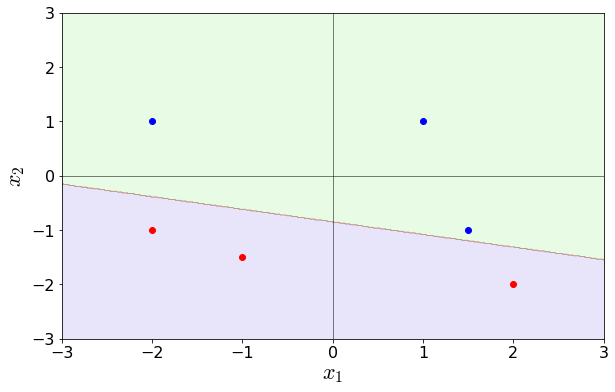

In [15]:
# Linearly separable Data sets
#X = [[1,1], [2,2], [4,4], [5,5], [5,4]]
#y = [1, 1, 0, 0, 0]

X = [[1,1], [2,-2], [1.5,-1], [-2,1], [-1,-1.5], [-2,-1]]
y = [1, 0, 1, 1, 0, 0]

# XOR problrm data set
#X = [[0,0], [1,0], [0,1], [1,1]]
#y = [1, 0, 0, 1]

# Add bias term to X
Xb = np.c_[np.ones((np.shape(X)[0], 1)), X]    

# Initialize random weight
weight = 5*np.random.random_sample((3)) - 5
eta    = 0.1
epoch  = 2000

idx = 0
print('\nInitial weight: ['+'  '.join('{:6.2f}'.format(f) for f in weight)+']\n')

# Single perceptron training
for iter in range(epoch):
    error = 0.
    for x, yt in zip(Xb, y):
        y_pred = np.heaviside(x.dot(weight), 0.0)
        err = yt - y_pred
        weight = weight + eta*err*x
        error += np.abs(err)/6.
    idx += 1
    print('Epoch: {0:3d},  error: {1:6.3f},'.format(idx, error) + \
          '   weight: ['+'  '.join('{:6.2f}'.format(f) for f in weight)+']')
    
    # The data set is linearly separable. So we use zero error as the exit condition.
    if (error < 1.e-6):
        break

print('\nDecision boundary interceptions: ')
print('x1:{0:8.3f}, x2:{1:8.3f}'.format(-weight[0]/weight[1], -weight[0]/weight[2]))

# Plot data and decision boundary
size = 400
xmin = np.min(np.amin(X, axis=0))-1
xmax = np.max(np.amax(X, axis=0))+1
ymin = np.min(np.amin(X, axis=1))-1
ymax = np.max(np.amax(X, axis=1))+1

xx, yy = np.meshgrid( np.linspace(xmin, xmax, size), np.linspace(ymin, ymax, size))

mesh   = np.c_[xx.ravel(), yy.ravel()]
# Add bias term to the mesh
meshb  = np.c_[np.ones((mesh.shape[0], 1)), mesh]
z  = np.heaviside(meshb.dot(weight), 1.0)
zz = np.reshape(z, xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, zz, cmap=plt.cm.brg, alpha=0.1)

# Plot data points
style = [ 'bo' if x > 0 else 'ro'  for x in y ]
for x, c in zip(X, style):
    plt.plot(x[0], x[1], c)   
plt.hlines(0, xmin, xmax, color='k', lw=0.5)
plt.vlines(0, ymax, ymin, color='k', lw=0.5)  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_1$', fontsize=22)
plt.ylabel(r'$x_2$', fontsize=22)
plt.show()

So the simple example demonstrates how a Perceptron is trained. Most importantly, one can see from the figure that

1. A Perceptron has only one decision boundary.
2. The decision boundary of a Perceptron is linear. 

Apparently for a more complex data set, the Perceptron's linearity would suffer badly. To see why, let's move on the the next section.

## 3. The XOR classification problem<a id="Part_3"></a>
<a href="#Top">Back to page top</a>

The XOR classification problem is the one of using a neural network to predict the outputs of XOR logic gates given two binary inputs. The possible inputs and outs of XOR gates are

| input 1 | input 2 | output |
|---------|---------|--------|
|     0   |     0   |    0   |   
|     0   |     1   |    1   |
|     1   |     1   |    0   |
|     1   |     0   |    1   |

This problem can also be demonstrated using the Cartesian coordinate system, shown as follows:

<img src="./images/fig_XOR.png" width='240'>

The figure clearly shows that there is no way of seperating squares and triangles using one decision boundary. This is true for a single layer perceptron as well as for any linear classification models. __We can also demonstrate this issue by applying the single perceptron model we just built to the XOR data set.__ The training error will never converge to the minimum. 

An excellent and beautiful demonstration of the XOR problem can be found using the <a href="http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=3,3,3&seed=0.52109&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">TensorFlow Playground</a>. As shown in the following figure, the link sets up a neural network with four layers. The input layer has two inputs and the output layer has three output neurons. When applied to the more involved XOR dataset, one can use the link to show that the network will never find a suitable decision boundary.

<img src="./images/fig_DL01-XOR.png" width='840'>

This is because the activation function in our neural network example is linear. It can be easily shown that as long as the activation function is linear, the entire network is effectively doing a linear transformation. Since XOR is not a linearly separable problem, it is no surprise that our network would fail.

## 4. Multi-Layer Perceptron<a id="Part_4"></a>
<a href="#Top">Back to page top</a>

A solution to the XOR problem is to stack multiple perceptron layers, forming the so-called multi-layer perceptron (MLP). A generic MLP is composed of one input layer, one or more layers of LTUs called hidden layers, and one final layer of LTUs called the output layer. The following figure is an example.

<img src="./images/fig_MLP.png" width='500'>

The most important development in neural network training is the idea of backpropagation algorithm. It could be described as __gradient descent using reverse-mode autodiff.__ Here is a breakdown of the algorithm

For each training instance $x$:
- Feed $x$ to the network and computes the outputs of every neuron in each layer. That is, forward pass.
- Measure the network's output error by comparing the desired output and actual output.
- Computes how much each neuron in the last hidden layer contributed to each output neuron's error.
- Estimates how much of these error contributions came from the previous layer.
- Keep doing the same backward error estimation until the algorithm reaches the input layer.
- The last step: apply Gradient Descent on all connection weights using the error gradients measured previously. So the weights get adjusted in order to redue the error.

The reverse pass efficiently measures the error gradient across all the connection weights by __propagating the error gradient backward__ in the network. 

In order for the calculation of gradients to work, one needs to use a differentiable activation function. Common candidates are:
- Logistic function $$f(z) = 1/(1+\exp(-z)).$$
- Hyperbolic tangent function $$f(z) = \tanh(z).$$
- ReLU function $$f(z) = \mbox{max}(0,z).$$

An MLP is often used for classification, with each output corresponding to a different binary class. __When the classes are exclusive, the softmax function is often shared across the output layer as the activation function.__